# Import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%matplotlib inline

# Import data

In [2]:
def get_dataset():
    """ Build synthetic dataset using make_regression class
    """
    X, y = make_regression(n_samples=2000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    
    return X, y

In [3]:
X, y = get_dataset()

# check first observation
X[0,:]

array([-1.03842731,  0.39889557,  0.10840247, -0.74278113, -0.04313474,
        0.27890636,  0.35109643, -1.33507292, -1.22616188, -0.24320448,
       -0.15520862, -0.13386639, -0.66651464,  0.37182297, -0.87322973,
        0.92231333,  0.35656344,  1.81377038,  2.00138342,  0.86033476])

# Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


# Stacking Regression

In [6]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


def get_models():
    models = dict()
    
    models['knn'] = KNeighborsRegressor()
    models['trreg'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models


def evaluate_model(model, X, y):
    """ Use cv validation score to test a molde's accuracy
    """
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    scores = cross_val_score(model, X, y, 
                             scoring='neg_mean_absolute_error', 
                             cv=cv, n_jobs=-1, 
                             error_score='raise')
    
    return scores

In [7]:
models = get_models()
models

{'knn': KNeighborsRegressor(), 'trreg': DecisionTreeRegressor(), 'svm': SVR()}

In [8]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('{0:<5} {1:.3f} {2:.3f}'.format(name, mean(scores), std(scores)))

knn   -116.020 6.491
trreg -185.648 11.794
svm   -186.016 10.204


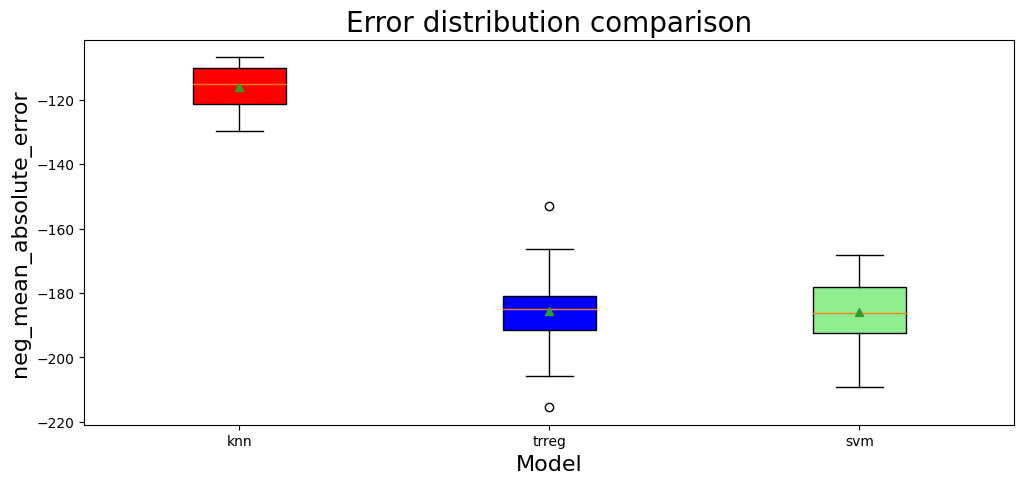

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
bplot1 = ax.boxplot(results, labels=names, showmeans=True, patch_artist=True)
ax.set_ylabel('neg_mean_absolute_error',fontsize=16)
ax.set_xlabel('Model',fontsize=16)
ax.set_title('Error distribution comparison',fontsize=20)

colors = ['red', 'blue', 'lightgreen','magenta']
for patch, color in zip(bplot1['boxes'],colors):
    patch.set_facecolor(color)
    
plt.show()

In [10]:
from sklearn.ensemble import StackingRegressor

def get_stacked_regression():
    """
    """
    level0 = []
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('trreg', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))

    level1 = LinearRegression()
    
    # create ensemble regressor using stacking
    model = StackingRegressor(estimators=level0, 
                              final_estimator=level1, 
                              cv=5)

    return model


def get_models_and_stacked():
    """
    """
    models = dict()
    
    models['knn'] = KNeighborsRegressor()
    models['trreg'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacked_regression()
    
    return models

In [11]:
models_stacked = get_models_and_stacked()

results, names = list(), list()
for name, model in models_stacked.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('{0:<10} {1:.3f} {2:.3f}'.format(name, mean(scores), std(scores)))

knn        -116.020 6.491
trreg      -183.818 10.016
svm        -186.016 10.204
stacking   -64.870 4.652


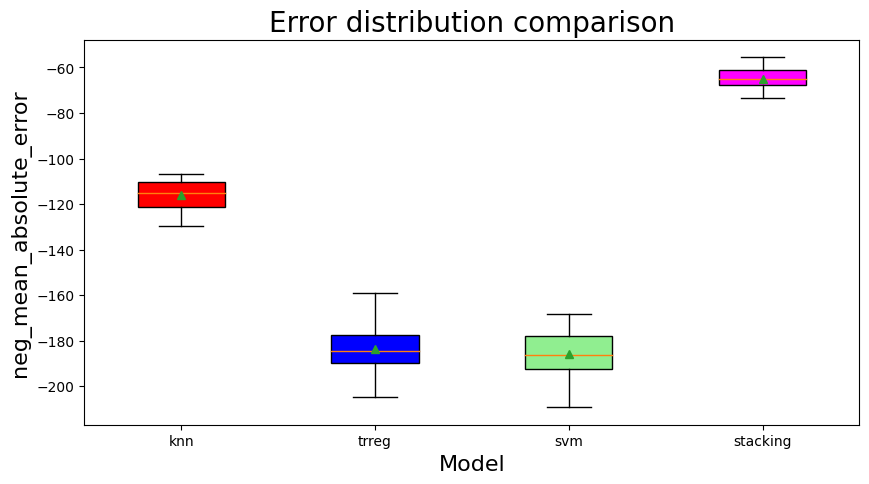

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
bplot1 = ax.boxplot(results, labels=names, showmeans=True, patch_artist=True)
ax.set_ylabel('neg_mean_absolute_error',fontsize=16)
ax.set_xlabel('Model',fontsize=16)
ax.set_title('Error distribution comparison',fontsize=20)

colors = ['red', 'blue', 'lightgreen','magenta']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [14]:
for model in models_stacked.keys():
    print("{0:<10} {1}".format(model, models_stacked[model].fit(X_train, y_train).score(X_test, y_test)))

knn        0.654483441274307
trreg      0.11860718859098063
svm        0.11899700626566567
stacking   0.8806814425360106
